# PCA

차원의 저주: 특성이 많을수록 데이터 양도 많아져야 함

- 투영: 차원 축소 알고리즘 다차원을 2차원으로 어느 축에서 실행하냐에 따라 결과가 달라짐

PCA: 분산이 최대로 되는 축을 선택하고 축에 대해서 투영

# PCA 적용 다중 분류(Seeds)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1.데이터준비

In [12]:
columns = ['area', 'perimeter', 'compactness', 'length','width','asymmetry', 'groove', 'class']

In [13]:
df=pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/Dataset/seeds_dataset.txt',
               names = columns,
               sep='\s+')
df.shape

(210, 8)

In [14]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


##2.정보확인

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  210 non-null    float64
 3   length       210 non-null    float64
 4   width        210 non-null    float64
 5   asymmetry    210 non-null    float64
 6   groove       210 non-null    float64
 7   class        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
class,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [18]:
df['class'].value_counts()

,count
class,
1,70
2,70
3,70


- x,y 나누기
- 랜덤 포레스트

##3.X,y 나누기

In [19]:
X=df.drop('class', axis=1)
y=df['class']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

###데이터 타입 확인

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((168, 7), (168,), (42, 7), (42,))

In [31]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [32]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

##4.학습시키기

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=320, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=320, random_state=42)

##5.테스트

In [70]:
y_pred = clf.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 0.9047619047619048
recall: 0.9109
precision: 0.9009
f1: 0.9028


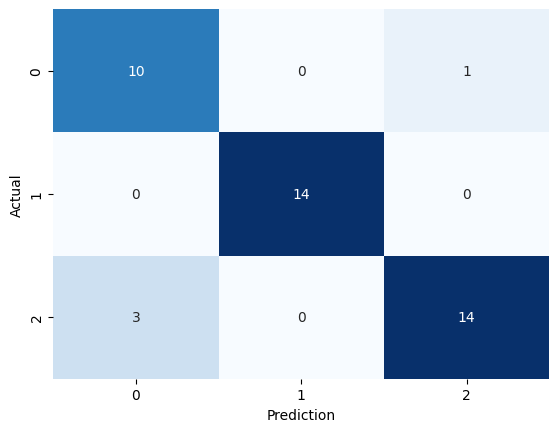

In [72]:
print_metrics(y_test, y_pred)

##PCA 적용

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [115]:
type(X_train), type(X_test), type(y_train), type(y_test),

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

In [116]:
X_train.head()

,area,perimeter,compactness,length,width,asymmetry,groove
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307
96,19.31,16.59,0.8815,6.341,3.810,3.477,6.238
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045
68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300
156,11.34,12.87,0.8596,5.053,2.849,3.347,5.003


In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_train_p = pca.fit_transform(X_train)

In [76]:
X_train_p

array([[-3.53515028e+00,  1.11779438e+00,  2.17890702e-01],
       [ 4.99201463e+00,  4.56245653e-01,  1.47092775e-01],
       [-3.02269199e+00,  1.43301590e+00, -1.54330135e-01],
       [-2.87587773e-01, -2.24946598e+00,  1.57373590e-01],
       [-3.94357373e+00, -8.12204241e-01,  5.93518412e-02],
       [ 4.65634456e+00, -1.43279034e+00,  1.13759014e-01],
       [ 1.61297019e+00,  7.54079940e-01, -1.50037938e-01],
       [-3.53107434e-02, -5.66335882e-01, -4.01442651e-02],
       [ 3.83925456e-01, -1.86088983e+00, -1.04872266e-01],
       [-3.79998520e+00,  1.08469141e+00,  2.31086187e-02],
       [ 4.82603591e+00,  3.59686207e-02,  9.81344127e-02],
       [-1.55000686e+00, -3.34923693e-01, -2.19915320e-03],
       [-2.50758515e+00,  1.07188606e-01, -2.26390111e-01],
       [ 4.85597912e-01, -1.41808052e-02, -2.13715671e-01],
       [ 1.53481276e+00,  3.21043463e-01,  2.20631856e-01],
       [-3.10386528e-01, -2.41386388e+00,  6.65825697e-02],
       [-2.21637874e+00, -1.64204366e+00

In [79]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [82]:
y_train = y_train.to_numpy()

In [110]:
clf = RandomForestClassifier(n_estimators=350, random_state=42)
clf.fit(X_train_p, y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

##테스트

In [111]:
X_test_p = pca.transform(X_test)
# y_test = y_test.to_numpy()

In [112]:
X_test_p[:5]

array([[-1.57282384, -3.02722608,  0.18272124],
       [-4.09234195,  0.13940935,  0.07593649],
       [ 5.27648207, -0.03053653,  0.13706229],
       [-2.40562332, -1.17276408, -0.35746239],
       [-3.85166908, -1.48086439, -0.24172876]])

In [113]:
y_pred = clf.predict(X_test_p)
y_pred

array([1, 3, 2, 1, 1, 3, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2, 1, 1, 3, 2, 2, 1,
       3, 2, 2, 3, 1, 2, 1, 3, 3, 3, 2, 1, 2, 2, 3, 2, 2, 3, 1, 3])

acc: 0.9047619047619048
recall: 0.9109
precision: 0.9009
f1: 0.9028


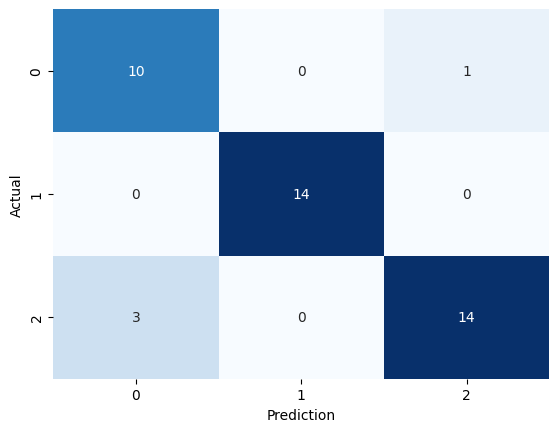

In [114]:
print_metrics(y_test, y_pred)

# 끝